# KNN Algorithm - Zoo Problem
# ----------------------------------------------------------------------------------------------------------

## Problem Statement - Implement a KNN model to classify the animals in to category.

## 1. Import necessary libraries :

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2. Import datasets:

In [2]:
zoo_data = pd.read_csv('Zoo.csv',sep =',')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## 3. Data Understanding :

In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [7]:
# Renaming Columns

zoo_data.columns = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
                   'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
                   'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

In [8]:
zoo_data.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
zoo_data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

## 4. Model Building :

In [10]:
del zoo_data['animal_name']

In [11]:
X = zoo_data.drop(labels= 'type',axis =1)
y = zoo_data[['type']]

In [12]:
X.shape,y.shape

((101, 16), (101, 1))

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=12,shuffle=True,stratify=y)

In [14]:
X_train.shape,y_train.shape

((85, 16), (85, 1))

In [15]:
X_test.shape,y_test.shape

((16, 16), (16, 1))

## 5. Model Training | Testing | Evaluation

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

### for k=3

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,)
knn_classifier.fit(X_train,y_train)
y_predict_train_1 = knn_classifier.predict(X_train)
y_predict_test_1 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_1),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_1))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_1),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_1))

Train Accuracy Score : 0.9647
Training Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        17
           3       1.00      0.50      0.67         4
           4       0.92      1.00      0.96        11
           5       0.75      1.00      0.86         3
           6       0.88      1.00      0.93         7
           7       1.00      0.88      0.93         8

    accuracy                           0.96        85
   macro avg       0.93      0.91      0.91        85
weighted avg       0.97      0.96      0.96        85

Test Accuracy Score : 0.9375
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
         

### for k = 5

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=4,)
knn_classifier.fit(X_train,y_train)
y_predict_train_2 = knn_classifier.predict(X_train)
y_predict_test_2 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_2),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_2))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_2),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_2))

Train Accuracy Score : 0.9647
Training Classification Report :
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        17
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00        11
           5       0.75      1.00      0.86         3
           6       0.88      1.00      0.93         7
           7       1.00      0.75      0.86         8

    accuracy                           0.96        85
   macro avg       0.94      0.93      0.93        85
weighted avg       0.97      0.96      0.96        85

Test Accuracy Score : 0.9375
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
         

### for k = 7

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=7,)
knn_classifier.fit(X_train,y_train)
y_predict_train_3 = knn_classifier.predict(X_train)
y_predict_test_3 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_3),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_3))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_3),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_3))

Train Accuracy Score : 0.8824
Training Classification Report :
               precision    recall  f1-score   support

           1       0.97      0.94      0.96        35
           2       1.00      1.00      1.00        17
           3       0.00      0.00      0.00         4
           4       0.61      1.00      0.76        11
           5       0.75      1.00      0.86         3
           6       0.88      1.00      0.93         7
           7       1.00      0.50      0.67         8

    accuracy                           0.88        85
   macro avg       0.74      0.78      0.74        85
weighted avg       0.87      0.88      0.86        85

Test Accuracy Score : 0.8125
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
         

## ----------------------------------------------------------------------------------------------------------------------------

### Lets standardize input features to see the difference in accuracy

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(X)
scaled_x = pd.DataFrame(data =x_scaled,columns=X.columns)
scaled_x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


## 4. Model Building :

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.15,random_state=12,shuffle=True,stratify=y)

In [22]:
X_train.shape,y_train.shape

((85, 16), (85, 1))

In [23]:
X_test.shape, y_test.shape

((16, 16), (16, 1))

## 5. Model Training | Testing | Evaluation

### for k=3

In [24]:
knn_classifier = KNeighborsClassifier(n_neighbors=3,)
knn_classifier.fit(X_train,y_train)
y_predict_train_4 = knn_classifier.predict(X_train)
y_predict_test_4 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_4),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_4))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_4),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_4))

Train Accuracy Score : 0.9647
Training Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.94      1.00      0.97        17
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00        11
           5       0.75      1.00      0.86         3
           6       0.88      1.00      0.93         7
           7       1.00      0.88      0.93         8

    accuracy                           0.96        85
   macro avg       0.94      0.91      0.91        85
weighted avg       0.97      0.96      0.96        85

Test Accuracy Score : 0.9375
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
         

### for k = 5

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5,)
knn_classifier.fit(X_train,y_train)
y_predict_train_5 = knn_classifier.predict(X_train)
y_predict_test_5 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_5),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_5))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_5),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_5))

Train Accuracy Score : 0.9647
Training Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.94      1.00      0.97        17
           3       1.00      0.50      0.67         4
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00         3
           6       0.88      1.00      0.93         7
           7       1.00      0.88      0.93         8

    accuracy                           0.96        85
   macro avg       0.96      0.91      0.92        85
weighted avg       0.97      0.96      0.96        85

Test Accuracy Score : 1.0
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5

### for k = 7

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=7,)
knn_classifier.fit(X_train,y_train)
y_predict_train_6 = knn_classifier.predict(X_train)
y_predict_test_6 = knn_classifier.predict(X_test)

print('Train Accuracy Score :',round(accuracy_score(y_train,y_predict_train_6),4))
print('Training Classification Report :\n',classification_report(y_train,y_predict_train_6))
print('Test Accuracy Score :',round(accuracy_score(y_test,y_predict_test_6),4))
print('Test Classification Report :\n',classification_report(y_test,y_predict_test_6))

Train Accuracy Score : 0.9294
Training Classification Report :
               precision    recall  f1-score   support

           1       0.97      1.00      0.99        35
           2       0.94      1.00      0.97        17
           3       1.00      0.25      0.40         4
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00         3
           6       0.70      1.00      0.82         7
           7       1.00      0.62      0.77         8

    accuracy                           0.93        85
   macro avg       0.93      0.84      0.84        85
weighted avg       0.94      0.93      0.92        85

Test Accuracy Score : 0.9375
Test Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
         

## ----------------------------------------------------------------------------------------------------------------------------

### How to choose optimal number of neigbours :

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cv_scores= []
training_accuracy = []
test_accuracy =[]

for i in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors= i)
    cross_validation_scored = cross_val_score(estimator=knn_model, X= scaled_x,y=y,cv=5)
    knn_model.fit(scaled_x,y)
    training_accuracy.append(knn_model.score(X_train,y_train))
    test_accuracy.append(knn_model.score(X_test,y_test))
    cv_scores.append(cross_validation_scored.mean())

In [29]:
cv_scores.index(max(cv_scores))

0

In [30]:
import numpy as np
cv_score_array = np.array(cv_scores)
training_accuracy_array = np.array(training_accuracy)
test_accuracy_array = np.array(test_accuracy)
classification_report_array = np.array(classification_report)

scores = {'cv_scores': cv_score_array,
         'training_accuracy':training_accuracy_array,
         'test_accuracy':test_accuracy_array}
pd.DataFrame(scores)

,cv_scores,training_accuracy,test_accuracy
0,0.950476,1.000000,1.0000
1,0.930476,0.976471,1.0000
2,0.940000,0.976471,1.0000
3,0.920000,0.941176,1.0000
4,0.860476,0.941176,1.0000
5,0.880476,0.894118,0.9375
6,0.860476,0.882353,0.8750
7,0.860952,0.858824,0.8125
8,0.861429,0.905882,0.8125
9,0.861429,0.882353,0.8750


### using visuals:

In [31]:
import matplotlib.pyplot as plt

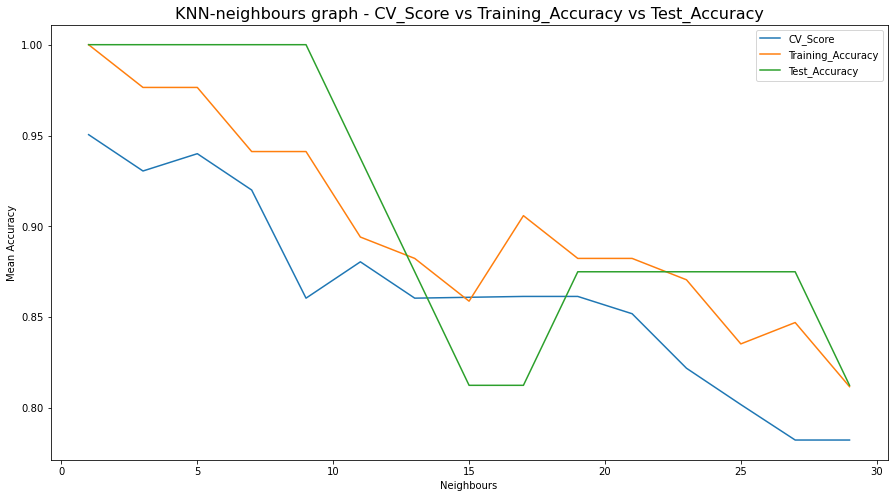

In [32]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31,2),cv_scores,label = 'CV_Score')
plt.plot(range(1,31,2),training_accuracy,label = 'Training_Accuracy')
plt.plot(range(1,31,2),test_accuracy,label = 'Test_Accuracy')
plt.title('KNN-neighbours graph - CV_Score vs Training_Accuracy vs Test_Accuracy',fontsize=16)
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()